Q1. Create a scatterplot of the Sepal.Length and Petal.Length variables in the iris dataset using the plot function? Add appropriate labels and title to the plot. Save the plot as a high-resolution image file.

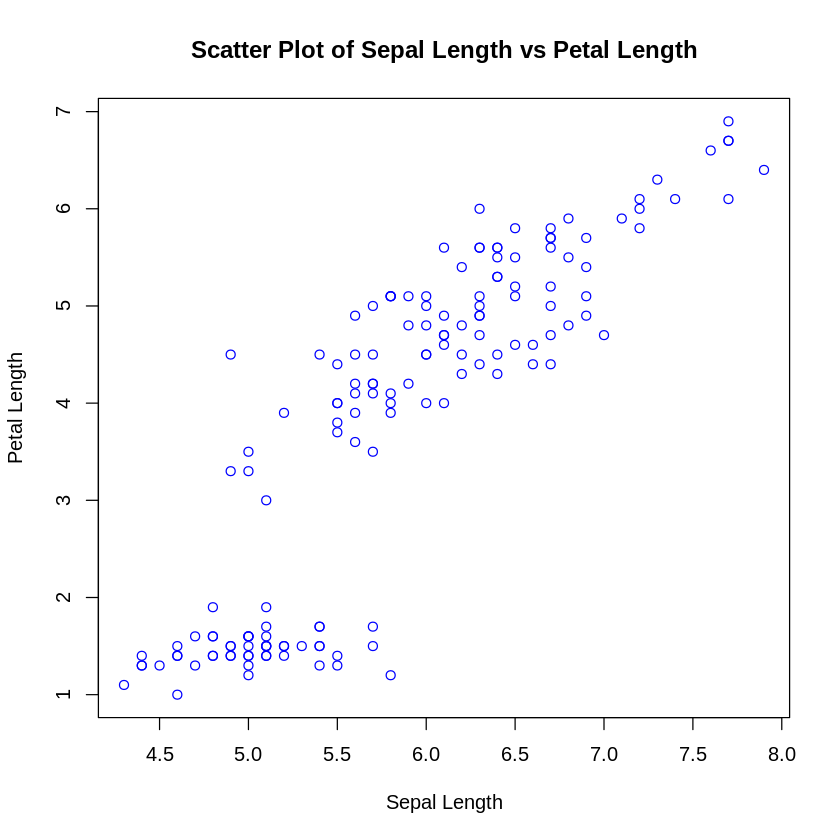

In [1]:
data(iris)
plot(iris$Sepal.Length,iris$Petal.Length,main="Scatter Plot of Sepal Length vs Petal Length",xlab="Sepal Length",ylab="Petal Length",col="blue")
png(filename = "iris_scatterplot.png", width = 2000, height = 1500, res = 300)

Q2.Create a scatterplot of the mpg and disp variables in the mtcars dataset. Use different colors to represent the cyl variable and add a smooth line to show the trend. Add appropriate labels, title, and legend to the plot

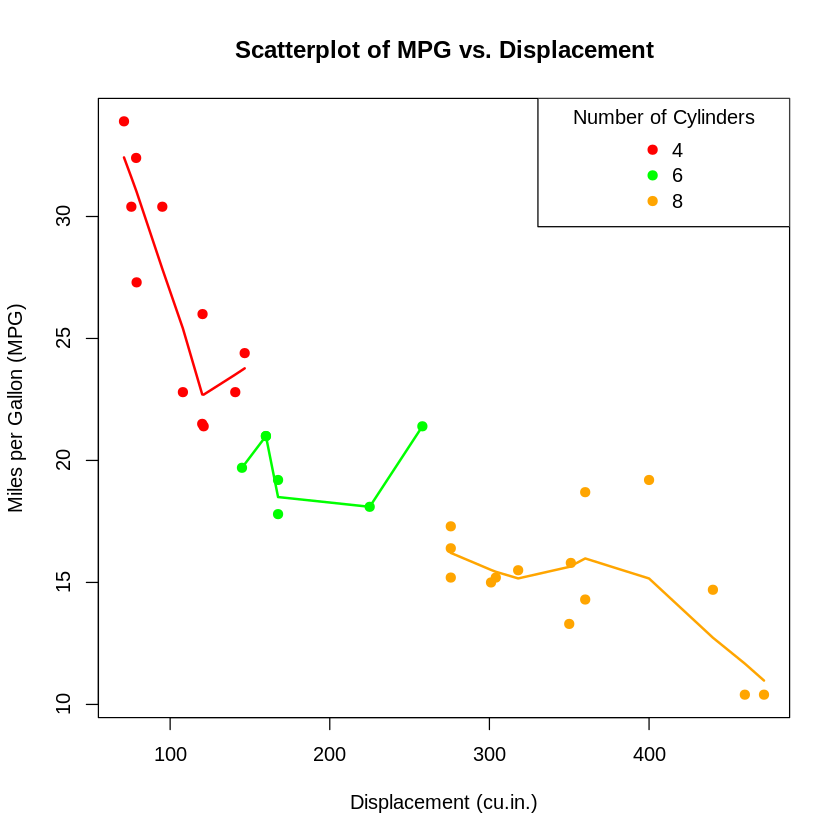

In [2]:
mtcars$cyl <- as.factor(mtcars$cyl)

colors <- c("red", "green", "orange")

plot(mpg ~ disp, data = mtcars,
     main = "Scatterplot of MPG vs. Displacement",
     xlab = "Displacement (cu.in.)",
     ylab = "Miles per Gallon (MPG)",
     col = colors[mtcars$cyl],
     pch = 19)

for (level in levels(mtcars$cyl)) {

  subset_data <- subset(mtcars, cyl == level)


  lines(lowess(subset_data$disp, subset_data$mpg),
        col = colors[which(levels(mtcars$cyl) == level)],
        lwd = 2)
}

legend("topright",
       legend = levels(mtcars$cyl),
       title = "Number of Cylinders",
       col = colors,
       pch = 19,
       bty = "y")

Q3.Create a bar plot of the number of cylinders (cyl) in the mtcars dataset. Use different colors to represent the transmission type (am). Add appropriate title, labels, and legend to the plot.

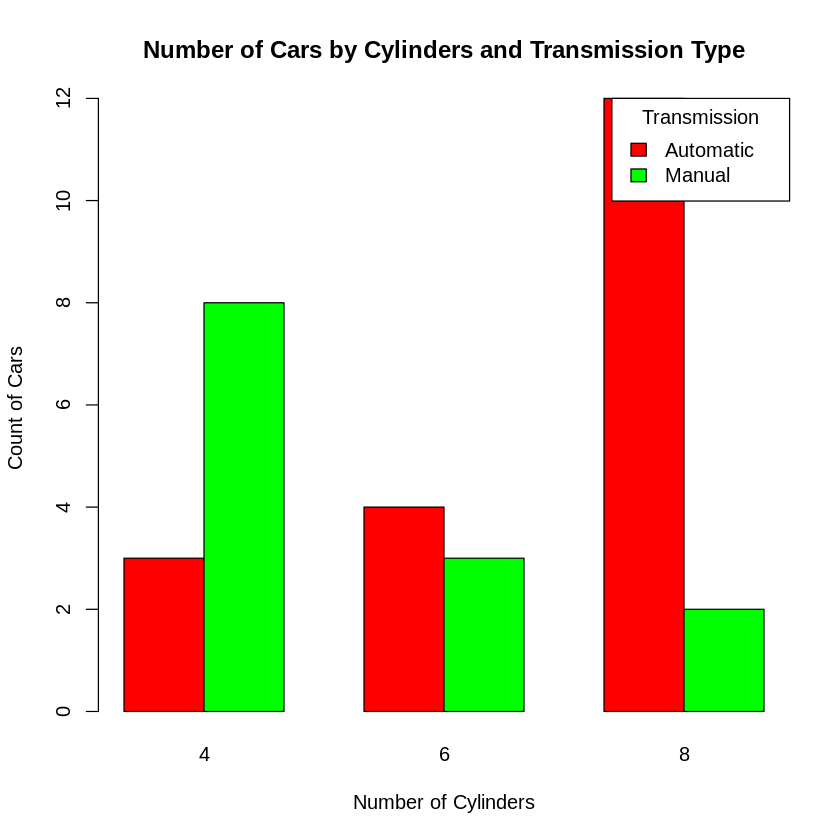

In [4]:
# Convert variables to factors
x <- as.factor(mtcars$cyl)   # Cylinders
y <- as.factor(mtcars$am)    # Transmission type (0 = Auto, 1 = Manual)

# Create a frequency table
tbl <- table(x, y)


# Create the bar plot
barplot(
  t(tbl),
  beside = TRUE,                             # Side-by-side bars for each transmission
  col = c("red", "green"),            # Colors for transmission types
  main = "Number of Cars by Cylinders and Transmission Type",
  xlab = "Number of Cylinders",
  ylab = "Count of Cars",
  legend.text = c("Automatic", "Manual"),    # Legend labels
  args.legend = list(title = "Transmission", x = "topright")
)

Q4.Create a histogram of the miles per gallon (mpg) in the mtcars dataset. Use different shades of blue to represent the frequency of each bin. Add appropriate title and labels to the plot. Calculate and display the mean and standard deviation of mpg on the plot.

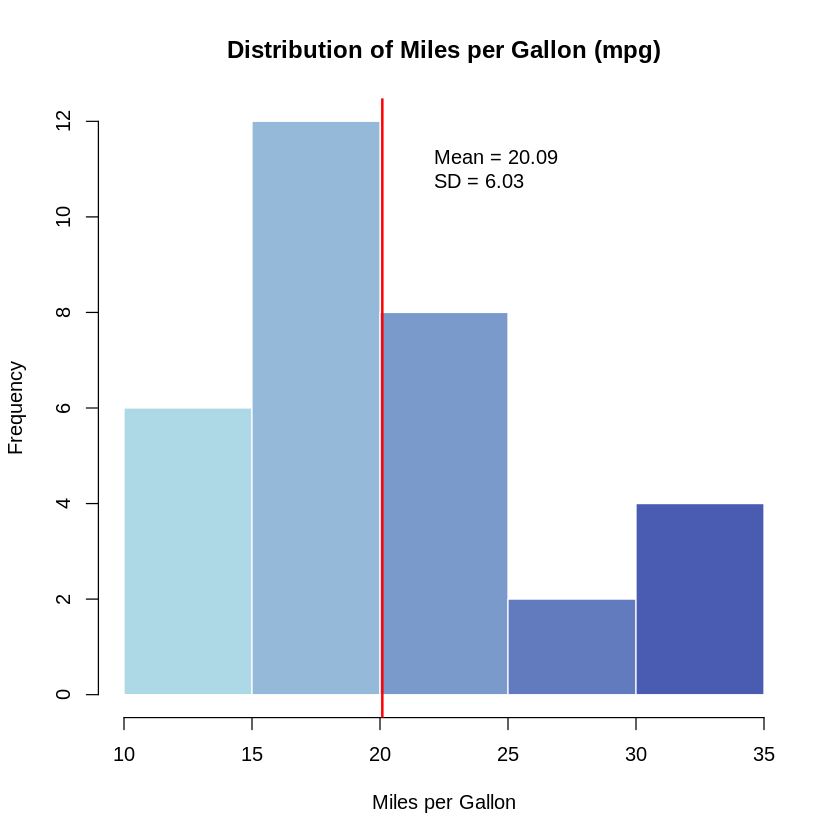

In [5]:
# Extract mpg values
mpg <- mtcars$mpg

# Compute statistics
mean_mpg <- mean(mpg)
sd_mpg <- sd(mpg)

# Create histogram data (without plotting yet)
h <- hist(
  mpg,
  breaks = 8,                         # Number of bins (you can adjust)
  col = colorRampPalette(c("lightblue", "darkblue"))(8), # Shades of blue
  main = "Distribution of Miles per Gallon (mpg)",
  xlab = "Miles per Gallon",
  ylab = "Frequency",
  border = "white"
)

# Add vertical line for mean
abline(v = mean_mpg, col = "red", lwd = 2)

# Add text with mean and SD
text(
  x = mean_mpg + 2,
  y = max(h$counts) - 1,
  labels = paste0(
    "Mean = ", round(mean_mpg, 2),
    "\nSD = ", round(sd_mpg, 2)
  ),
  col = "black",
  adj = 0
)

Q5.Create a box plot of the horsepower (hp) in the mtcars dataset. Use different shapes to represent the number of gears (gear). Add appropriate title, labels, and legend to the plot. Identify and label any outliers on the plot.

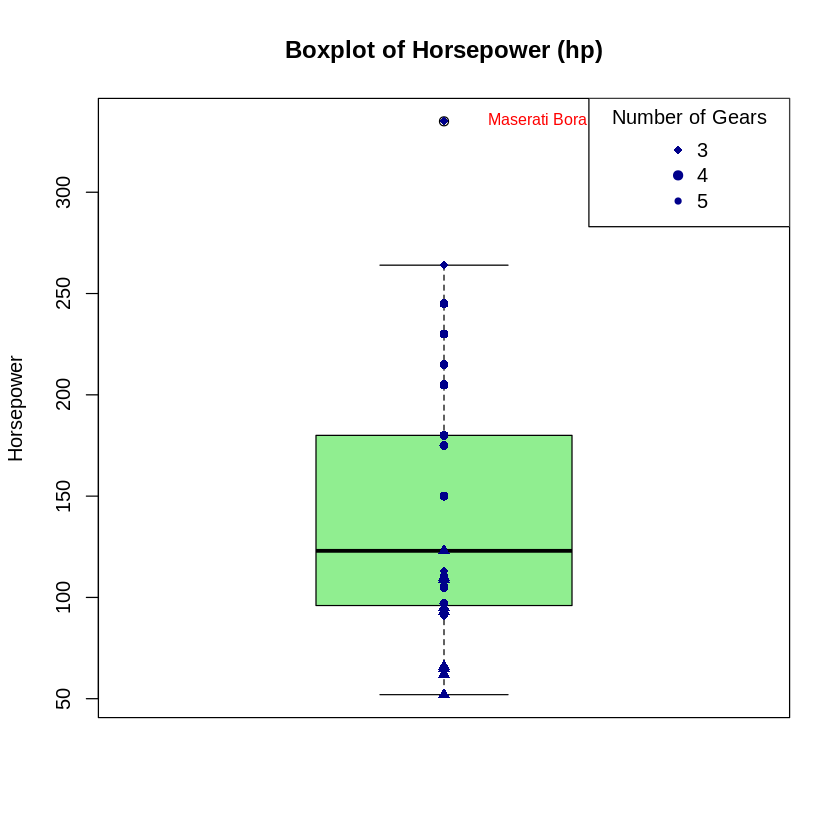

In [6]:
# Extract variables
hp <- mtcars$hp
gear <- as.factor(mtcars$gear)  # Gears as factor

# Create boxplot
boxplot(
  hp,
  main = "Boxplot of Horsepower (hp)",
  ylab = "Horsepower",
  xlab = "",
  outline = TRUE,
  col = "lightgreen"
)

# Identify outliers
bp <- boxplot.stats(hp)
outliers <- bp$out
outlier_indices <- which(hp %in% outliers)

# Add points with shapes based on gear
points(
  rep(1, length(hp)),            # x-coordinate (all at 1)
  hp,
  pch = as.numeric(gear) + 15,   # Different shapes for gear
  col = "darkblue"
)

# Add legend for gear
legend(
  "topright",
  legend = levels(gear),
  pch = as.numeric(levels(gear)) + 15,
  col = "darkblue",
  title = "Number of Gears"
)

# Label outliers
text(
  x = rep(1.05, length(outliers)),
  y = outliers,
   labels = rownames(mtcars)[outlier_indices],
  col = "red",
  cex = 0.8,
  pos = 4
)

Q6. Create a scatter plot of the displacement (disp) versus the weight (wt) in the mtcars dataset. Use different colors and sizes to represent the number of carburetors (carb). Add appropriate title, labels, and legend to the plot. Add a smooth line to show the trend of the relationship.

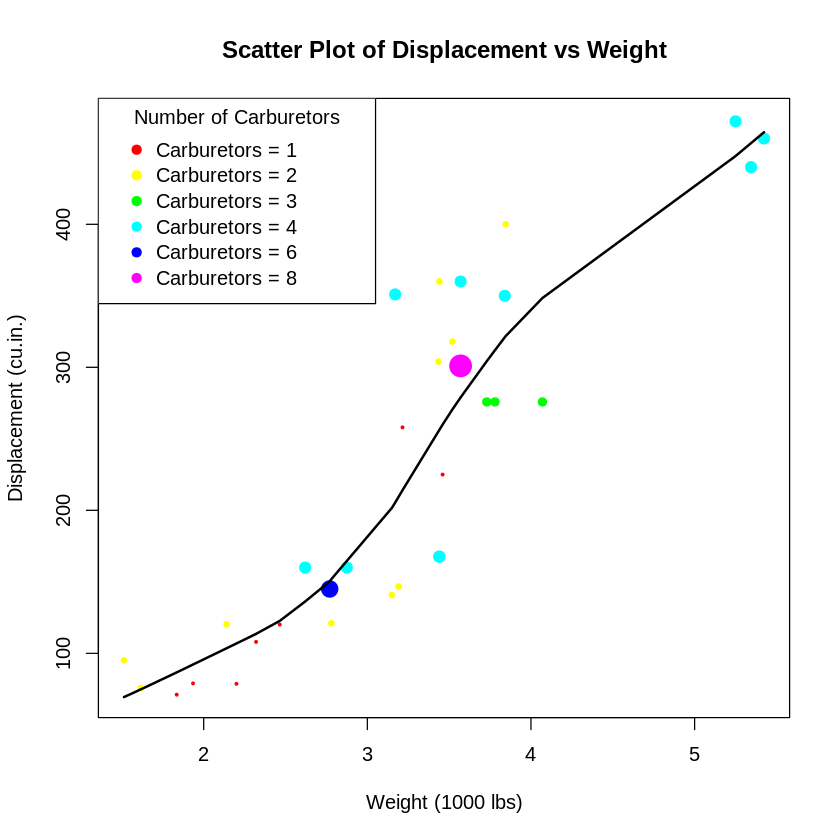

In [7]:
# Load data
data(mtcars)

# Define colors and sizes based on number of carburetors
carb_colors <- rainbow(length(unique(mtcars$carb)))[as.factor(mtcars$carb)]
carb_sizes <- mtcars$carb * 1.5  # Scale sizes

# Create scatter plot
plot(mtcars$wt, mtcars$disp,
     main = "Scatter Plot of Displacement vs Weight",
     xlab = "Weight (1000 lbs)",
     ylab = "Displacement (cu.in.)",
     col = carb_colors,
     pch = 19,
     cex = carb_sizes / 5)  # adjust size scaling

# Add smooth line (trend)
lines(lowess(mtcars$wt, mtcars$disp), col = "black", lwd = 2)

# Add legend
legend("topleft",
       legend = paste("Carburetors =", sort(unique(mtcars$carb))),
       col = rainbow(length(unique(mtcars$carb))),
       pch = 19,
       title = "Number of Carburetors")

Q7.Develop an R program to create a time series plot using real-world data. (https://www.kaggle.com/datasets/niketchauhan/covid-19-time series-data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘R.utils’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’



Attaching package: ‘ggplot2’


The following object is masked _by_ ‘.GlobalEnv’:

    mpg



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




,Date,Country.Region,Province.State,Confirmed,Recovered,Deaths
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,2020-01-22,Afghanistan,,0,0,0
2,2020-01-23,Afghanistan,,0,0,0
3,2020-01-24,Afghanistan,,0,0,0
4,2020-01-25,Afghanistan,,0,0,0
5,2020-01-26,Afghanistan,,0,0,0
6,2020-01-27,Afghanistan,,0,0,0


'data.frame':	231744 obs. of  6 variables:
 $ Date          : chr  "2020-01-22" "2020-01-23" "2020-01-24" "2020-01-25" ...
 $ Country.Region: chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Province.State: chr  "" "" "" "" ...
 $ Confirmed     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Recovered     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Deaths        : int  0 0 0 0 0 0 0 0 0 0 ...


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


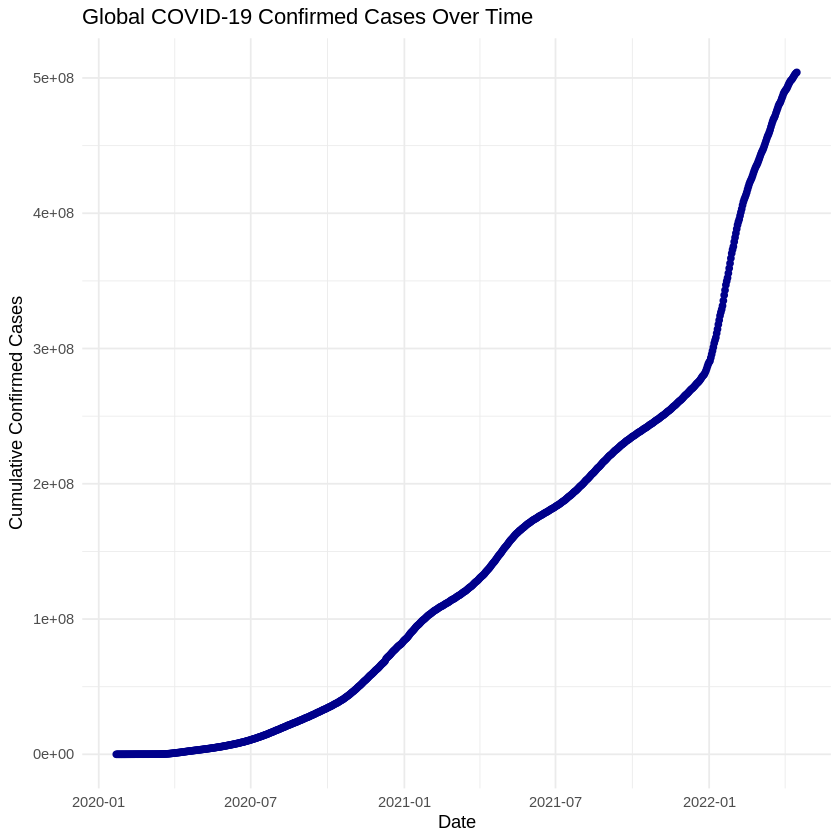

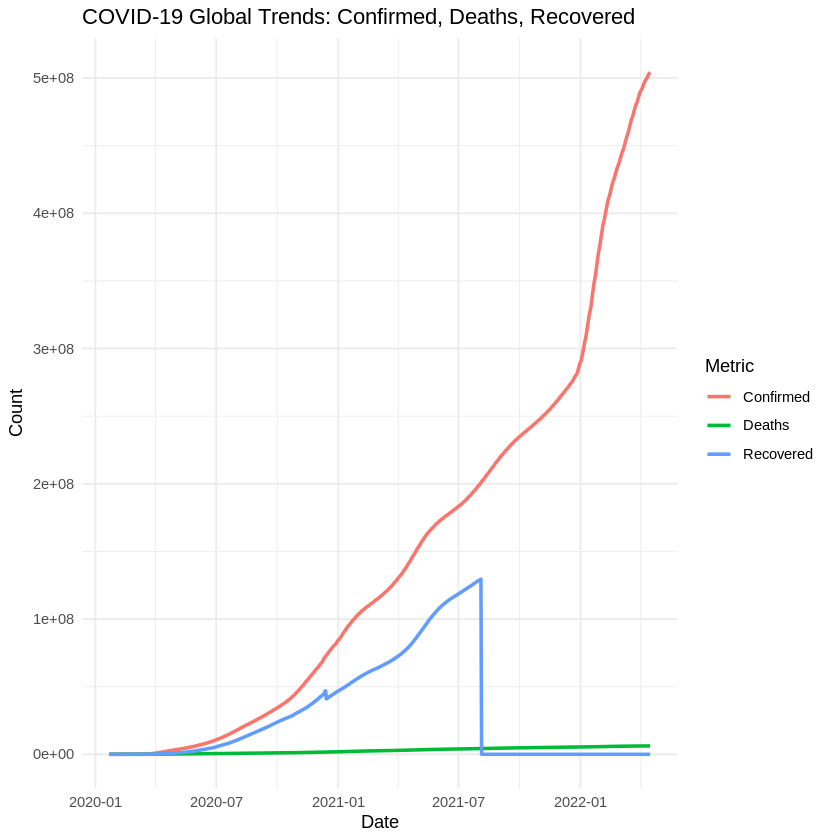

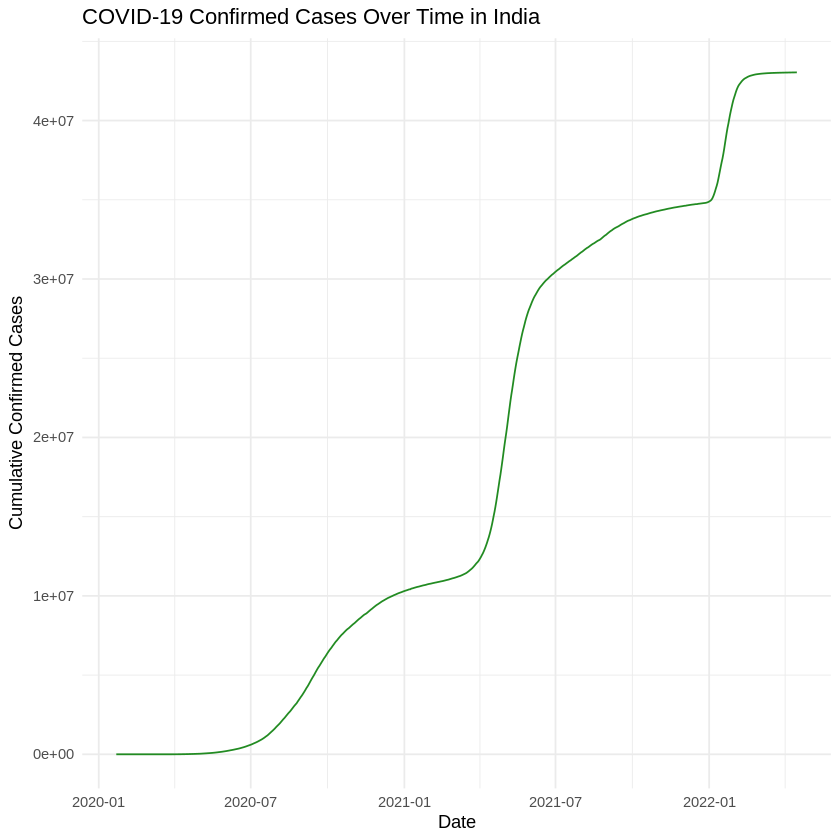

In [8]:
# Install the necessary packages for data and time series analysis
install.packages("COVID19")
install.packages("forecast")

# Load required packages
library(ggplot2)
library(dplyr)
library(lubridate)
library(tidyr)

# --------------------------------------------
# 1. Read the data from the GitHub raw URL
# --------------------------------------------
url <- "https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv"
covid <- read.csv(url, stringsAsFactors = FALSE)

# Preview
head(covid)
str(covid)

# --------------------------------------------
# 2. Clean / transform
# --------------------------------------------

# Convert date column to Date type
covid$Date <- as.Date(covid$Date)

# Sometimes there’s more than one row per country per date (if region data)
# Aggregate globally (sum over all countries) for each date
covid_global <- covid %>%
  group_by(Date) %>%
  summarise(
    Confirmed = sum(Confirmed, na.rm = TRUE),
    Deaths = sum(Deaths, na.rm = TRUE),
    Recovered = sum(Recovered, na.rm = TRUE)
  ) %>%
  arrange(Date)

# Alternatively, if you want to plot for a specific country (e.g. “India”):
covid_country <- covid %>%
  filter(Country.Region == "India") %>%
  group_by(Date) %>%
  summarise(
    Confirmed = sum(Confirmed, na.rm = TRUE),
    Deaths = sum(Deaths, na.rm = TRUE),
    Recovered = sum(Recovered, na.rm = TRUE)
  ) %>%
  arrange(Date)


# 3. Plot time series of Confirmed cases (global)


p <- ggplot(covid_global, aes(x = Date, y = Confirmed)) +
  geom_line(color = "steelblue", size = 1) +
  geom_point(color = "darkblue", size = 1.5) +
  labs(
    title = "Global COVID-19 Confirmed Cases Over Time",
    x = "Date",
    y = "Cumulative Confirmed Cases"
  ) +
  theme_minimal()

print(p)


# 4. Plot multiple metrics together (Confirmed, Deaths, Recovered)


# Pivot to long form
covid_long <- covid_global %>%
  pivot_longer(cols = c("Confirmed", "Deaths", "Recovered"),
               names_to = "Metric",
               values_to = "Count")

p2 <- ggplot(covid_long, aes(x = Date, y = Count, color = Metric)) +
  geom_line(size = 1) +
  labs(
    title = "COVID-19 Global Trends: Confirmed, Deaths, Recovered",
    x = "Date",
    y = "Count",
    color = "Metric"
  ) +
  theme_minimal()

print(p2)


# 5. (Optional) Plot for specific country

p_india <- ggplot(covid_country, aes(x = Date, y = Confirmed)) +
  geom_line(color = "forestgreen") +
  labs(
    title = "COVID-19 Confirmed Cases Over Time in India",
    x = "Date",
    y = "Cumulative Confirmed Cases"
  ) +
  theme_minimal()

print(p_india)

# --------------------------------------------
# End of script
# --------------------------------------------


Q8.Perform EDA on "Titanic Dataset". You are given the Titanic dataset, which contains information about passengers on the Titanic, including their survival status, age, class, and gender. a)plot the histogram of Number of parents and children of the passenger aboard(parch). b)Perform a detailed EDA, including advanced statistical analysis, to explore factors influencing survival rates.
c)Create a customized box plot to visualize the age distribution of survivors and non-survivors.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 


Overall Survival Counts:

  0   1 
549 342 

Overall Survival Rate (%):

       0        1 
61.61616 38.38384 

Survival by Gender:
        
           0   1
  female  81 233
  male   468 109

Survival by Passenger Class:
   
      0   1
  1  80 136
  2  97  87
  3 372 119

Average Age by Survival Status:
  Survived      Age
1        0 30.62618
2        1 28.34369


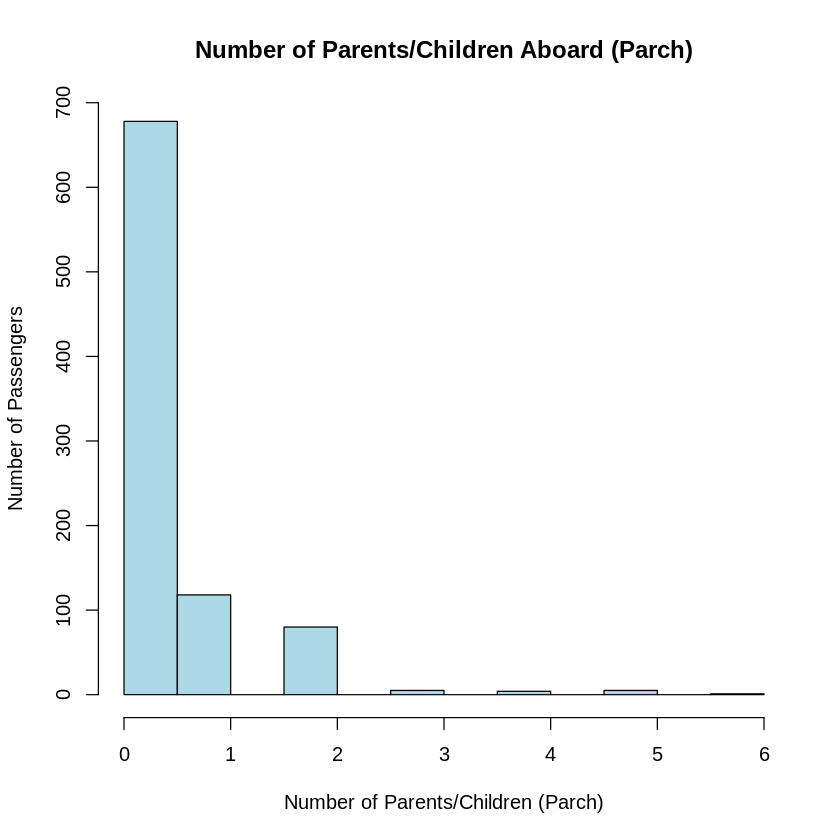

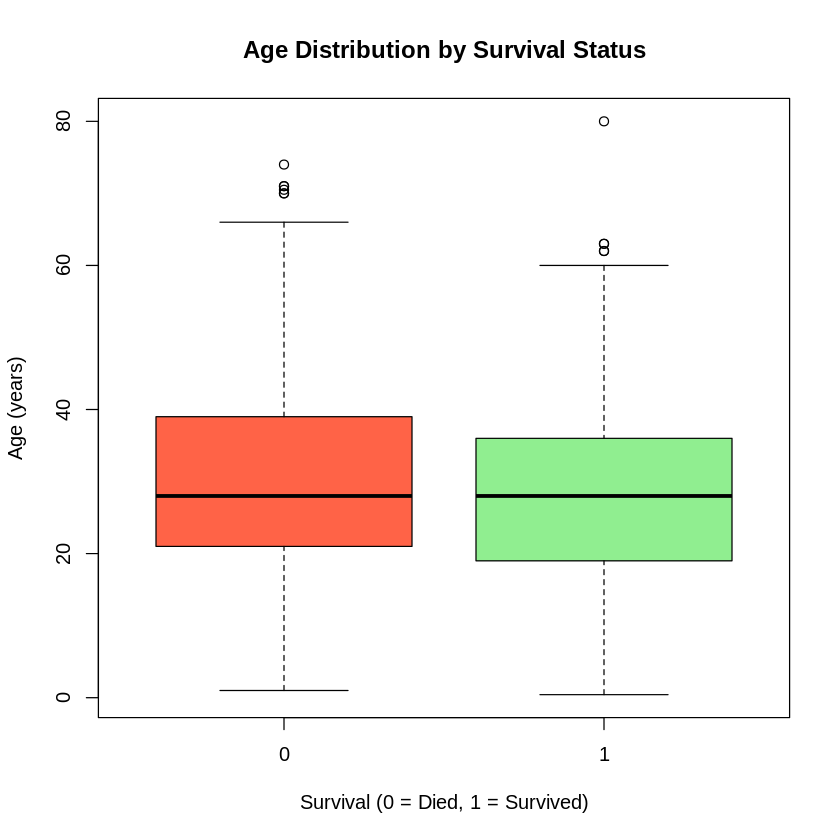

In [9]:

# Basic Exploratory Data Analysis (EDA) on Titanic Dataset


# Step 1: Load dataset
titanic <- read.csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Step 2: Preview the data
head(titanic)
str(titanic)
summary(titanic)

# (a) Histogram: Number of Parents/Children aboard (Parch)


hist(titanic$Parch,
     main = "Number of Parents/Children Aboard (Parch)",
     xlab = "Number of Parents/Children (Parch)",
     ylab = "Number of Passengers",
     col = "lightblue",
     border = "black")


# (b) Basic EDA: Exploring Factors Influencing Survival


# Overall survival counts and rates
cat("\nOverall Survival Counts:\n")
print(table(titanic$Survived))

cat("\nOverall Survival Rate (%):\n")
print(prop.table(table(titanic$Survived)) * 100)

# Survival by Gender
cat("\nSurvival by Gender:\n")
print(table(titanic$Sex, titanic$Survived))

# Survival by Passenger Class
cat("\nSurvival by Passenger Class:\n")
print(table(titanic$Pclass, titanic$Survived))

# Average Age of Survivors vs Non-Survivors
cat("\nAverage Age by Survival Status:\n")
print(aggregate(Age ~ Survived, data = titanic, FUN = mean, na.rm = TRUE))


# (c) Boxplot: Age Distribution of Survivors vs Non-Survivors


boxplot(Age ~ Survived, data = titanic,
        main = "Age Distribution by Survival Status",
        xlab = "Survival (0 = Died, 1 = Survived)",
        ylab = "Age (years)",
        col = c("tomato", "lightgreen"),
        border = "black")



Q9.EDA on "Iris Dataset" a) For the Iris dataset, which contains measurements of various iris flowers, conduct an EDA. a. Determine if there are statistically significant differences in sepal lengths between different species using a suitable statistical test. b. Create a pair plot to visualize the relationships between all variables.

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
           0            0            0            0            0

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  63.21  31.606   119.3 <2e-16 ***
Residuals   147  38.96   0.265                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

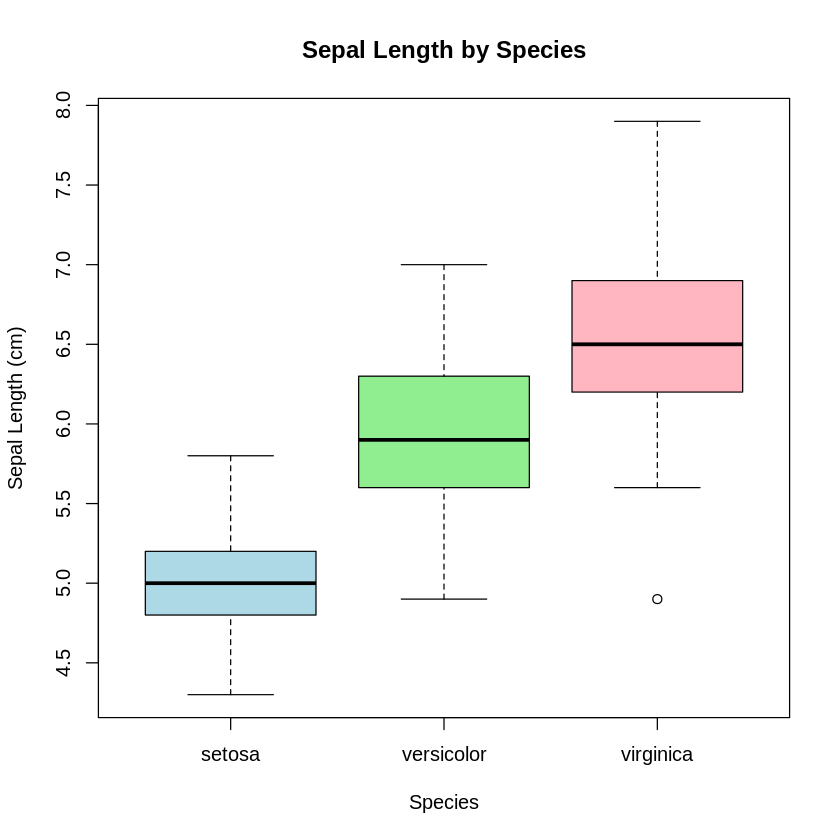

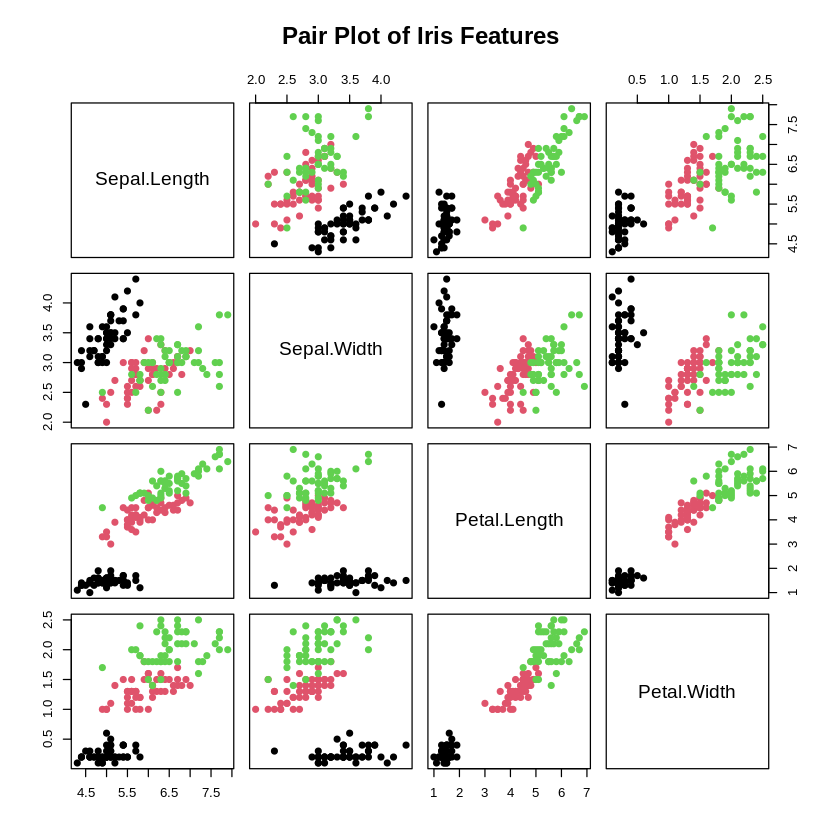

In [10]:
# Load the built-in dataset
data(iris)

# View the structure of the dataset
str(iris)

# Summary statistics
summary(iris)

# Check the first few rows
head(iris)
# Check for missing data
colSums(is.na(iris))
# Boxplot of Sepal.Length across species
boxplot(Sepal.Length ~ Species, data = iris,
        main = "Sepal Length by Species",
        xlab = "Species",
        ylab = "Sepal Length (cm)",
        col = c("lightblue", "lightgreen", "lightpink"))
# One-way ANOVA test
anova_result <- aov(Sepal.Length ~ Species, data = iris)
summary(anova_result)
pairs(iris[1:4],
      main = "Pair Plot of Iris Features",
      pch = 19,
      col = iris$Species)
